<a href="https://colab.research.google.com/github/YasaswiniReddy07/YasaswiniReddy07/blob/main/Classification_credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/credit_score.csv')
df.head()

<ipython-input-4-fe216c1ecffa>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df = df.drop(columns= ['ID', "Customer_ID", "Name", "SSN", "Type_of_Loan", "Credit_History_Age"])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape

(100000, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df["Age"] = df["Age"].str.replace("_", "")
df["Age"]=df["Age"].astype(int)
df["Occupation"] = df["Occupation"].replace("_______", np.nan)
df["Annual_Income"]= df["Annual_Income"].str.replace("_","")
df["Annual_Income"]= df["Annual_Income"].astype(float)
df["Num_of_Loan"]= df["Num_of_Loan"].str.replace("_", "")
df["Num_of_Loan"]= df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"]= df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]= df["Num_of_Delayed_Payment"].astype(float)
df["Credit_Score"]= df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0,1,2])
df["Monthly_Balance"]= df["Monthly_Balance"].str.replace("_", "")
df["Monthly_Balance"]= df["Monthly_Balance"].astype(float)
df["Payment_Behaviour"]= df["Payment_Behaviour"].replace("!@9#%8",np.nan)
df["Amount_invested_monthly"]= df["Amount_invested_monthly"].str.replace("_", "")
df["Amount_invested_monthly"]= df["Amount_invested_monthly"].astype(float)
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", "No")
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace(["Yes", "No"], [1,0])
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Credit_Mix"]= df["Credit_Mix"].replace("_", np.nan)
df["Credit_Mix"]= df["Credit_Mix"].replace(["Standard", "Good", "Bad"], [1,2,0])
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_", np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)

In [ ]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [ ]:
df = df.fillna(method="ffill")
df = df.fillna(method="bfill")
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

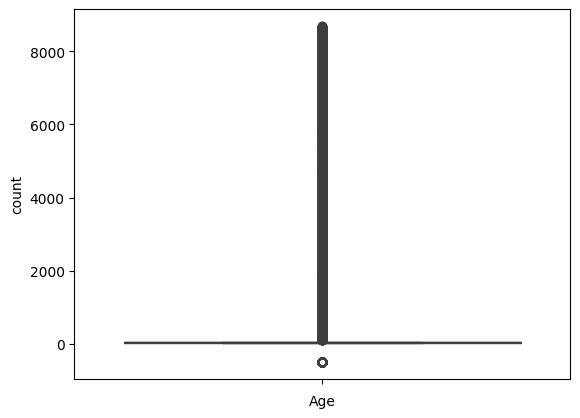

In [ ]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

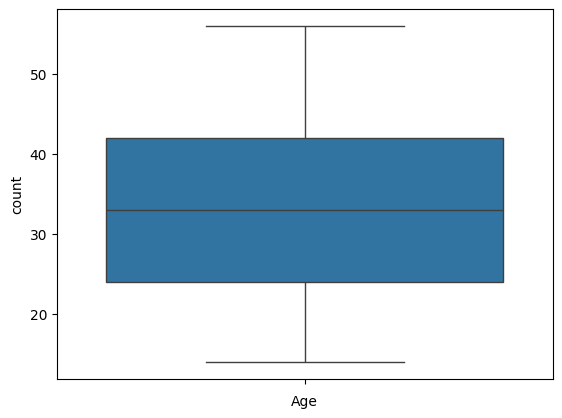

In [ ]:
  col_names=["Age"]
  Q1= df.Age.quantile(0.25)
  Q3= df.Age.quantile(0.75)
  IQR= Q3-Q1
  data = df[(df.Age >=Q1 -1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]
  sns.boxplot(data["Age"])
  plt.xlabel("Age")
  plt.ylabel("count")
  plt.show

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Month"]= le.fit_transform(df["Month"])
df["Occupation"]= le.fit_transform(df["Occupation"])
df["Payment_Behaviour"]= le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if((df[col].dtype !='object') & (col != 'Credit_Score')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

print(vif_data)

                     Feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000207


In [ ]:
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred =  lr.predict(X_test)
from sklearn.metrics import accuracy_score
pd.DataFrame({"actual_value": y_test, "Predicted_value": y_pred})

,actual_value,Predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)
pd.DataFrame({"actual_value": y_test, "Predicted_value": y_pred})

,actual_value,Predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,0
53421,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)
pd.DataFrame({"actual_value": y_test, "Predicted_value": y_pred})

,actual_value,Predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
